In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('paper')

In [2]:
csvpath = '../csvs/random/random_features/'
dfrand = pd.read_csv(csvpath+'random1e7featuressplit.csv', index_col=0)
dfrand.head()

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
0,1007.0,5.587629,0.464593,6.663128e-02,40139.135651,76.149933,4.335908,1.740396e+05,0.0,167.062457,98.031355,1041.763579,665.979295,80.197481,261.328819,10831.818995,66.059705,16.067438
1,1021.0,6.003999,0.327314,5.287958e-01,1017.008304,181.580826,2644.674138,2.689656e+06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1025.0,5.794418,0.385985,4.101035e-02,1181.328178,181.056332,570.925282,6.744501e+05,0.0,1243.771432,54.339329,542.262112,1228.099527,126.191854,549.181975,NaN,NaN,NaN
3,1041.0,5.730234,0.494415,8.813668e-07,1248.293429,124.395902,565.682402,7.144123e+05,0.0,9095.502208,9.486404,78.545670,NaN,NaN,NaN,NaN,NaN,NaN
4,10518.0,6.465849,0.431597,6.504852e-03,15455.587023,187.663491,599.867233,9.271300e+06,0.0,16753.088367,53.432842,553.408423,14203.638663,120.440190,652.741205,15294.062911,184.076605,606.202568


In [3]:
dfrand.shape

(244, 18)

There are two systems with KSpval = Nan, but both look much more lognormal than our cutoff by eye, so this won't flag them as bad

In [4]:
dfrand[dfrand['KSpval'].isnull()]

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
60,1504.0,4.118159,0.386328,NaN,52.621524,173.807660,230.554893,12132.149881,0.0,87.482596,12.801115,138.680725,129.720083,22.272145,93.52561,80.659596,55.594309,150.411735
214,2313.0,4.021209,0.437614,NaN,28.482759,182.654635,465.902079,13270.176544,0.0,36.552274,37.011622,363.046535,36.493522,80.595176,363.63102,29.030316,154.622762,457.114441


In [5]:
cutoffrand = 6.2e-18 # from instabilitytimehistograms.ipynb
badrand = (dfrand['KSpval'] < cutoffrand)
badrand.sum()

18

In [6]:
print("Fraction of bad random systems:{0:.3f}".format(badrand.sum()/dfrand.shape[0]))

Fraction of bad random systems:0.074


In [7]:
dfrand[(dfrand['KSpval'] < cutoffrand) & (dfrand['Nlyap10'] > 100)]

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
100,1819.0,4.329505,0.104577,3.559540e-43,536.417279,67.604695,37.779835,20265.756551,0.0,102.958764,21.641818,196.833720,76.987784,46.788046,263.233407,102.686290,56.669543,197.356011
211,2300.0,4.577946,0.129484,1.170932e-22,459.474787,132.999387,143.808591,66076.421954,0.0,338.297556,18.969901,195.320424,618.663271,23.067991,106.805148,575.041896,47.247927,114.907144


In [8]:
csvpath = '../csvs/resonant/resonant_features/'
dfres = pd.read_csv(csvpath+'res1e7featuressplit.csv', index_col=0)
dfres.head()

,ID,Mean,Sigma,KSpval,instability_time,tlyap10,megno10,Nlyap10
3,3.0,6.837504,0.306543,0.403103,2.287671e+06,16155.249034,13.950857,141.605409
4,4.0,5.687568,0.239838,0.001330,9.668931e+05,96689.311474,2.104692,10.000000
5,5.0,5.797549,0.456784,0.930714,5.755894e+05,691.667984,80.773003,832.175823
8,8.0,5.891151,0.417529,0.709091,2.930966e+05,2362.272279,12.443361,124.074012
13,13.0,4.644210,0.256174,0.000218,4.506090e+04,4506.103381,2.022401,9.999969


In [9]:
cutoffres = 1.2e-5
badres = dfres['KSpval'] < cutoffres
print("Fraction of bad systems:{0:.3f}".format(badres.sum()/dfres.shape[0]))

Fraction of bad systems:0.076


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

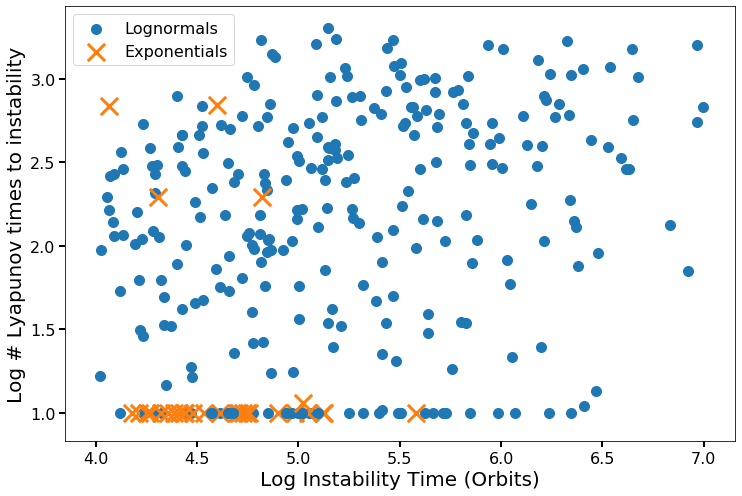

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
cmap = plt.get_cmap("tab10")
ax.scatter(np.log10(dfrand['instability_time'])[~badrand], np.log10(dfrand['Nlyap10'])[~badrand], c=cmap(0), marker='o', label='Lognormals')
ax.scatter(np.log10(dfrand['instability_time'])[badrand], np.log10(dfrand['Nlyap10'])[badrand], c=cmap(1), marker='x', s=300, label='Exponentials')
ax.scatter(np.log10(dfres['instability_time'])[~badres], np.log10(dfres['Nlyap10'])[~badres], c=cmap(0), marker='o')
ax.scatter(np.log10(dfres['instability_time'])[badres], np.log10(dfres['Nlyap10'])[badres], c=cmap(1), marker='x', s=300)
ax.set_xlabel('Log Instability Time (Orbits)')
ax.set_ylabel('Log # Lyapunov times to instability')
ax.legend()
fig.savefig('separatelognormals.pdf', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


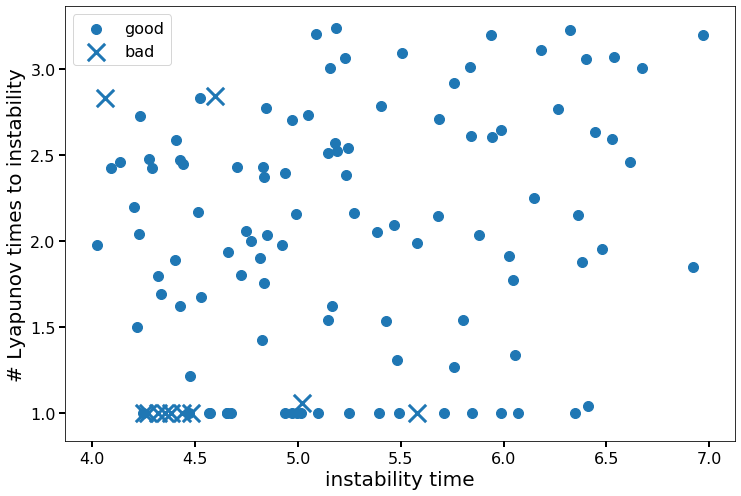

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.log10(dfres['instability_time'])[~badres], np.log10(dfres['Nlyap10'])[~badres], c=cmap(0), marker='o', label='good')
ax.scatter(np.log10(dfres['instability_time'])[badres], np.log10(dfres['Nlyap10'])[badres], c=cmap(0), marker='x', s=300, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

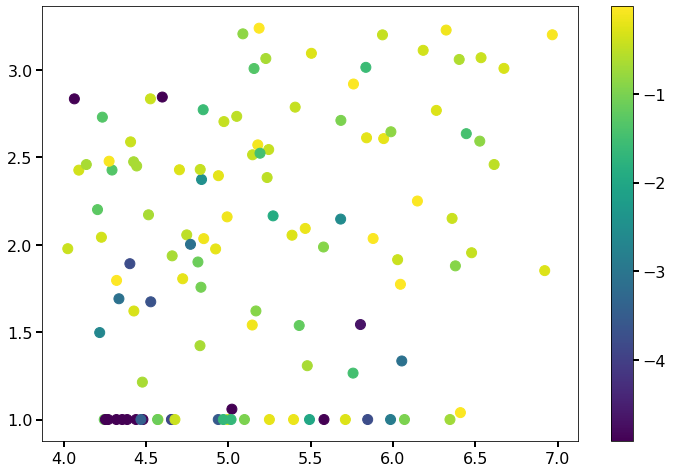

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(dfres['instability_time']), np.log10(dfres['Nlyap10']), c=np.log10(dfres['KSpval']), vmin=np.log10(cutoffres))
plt.colorbar(cb)

In [14]:
dfres[badres].sort_values('instability_time')

,ID,Mean,Sigma,KSpval,instability_time,tlyap10,megno10,Nlyap10
223,242.0,2.903427,0.890806,4.330748e-08,11584.510057,16.926166,71.776347,684.414287
60,60.0,4.283397,0.085474,2.771243e-20,17874.417924,1787.441792,2.012342,10.000000
89,89.0,4.266151,0.018597,1.790086e-18,18586.741139,1858.698363,1.515870,9.999870
218,228.0,3.549212,0.174091,5.088269e-20,20862.586618,2086.289839,1.992920,9.999851
165,165.0,4.491704,0.309658,8.877114e-14,22615.560599,2261.573380,2.002199,9.999923
166,166.0,4.616113,0.359195,2.422192e-10,24248.884511,2424.905772,2.354679,9.999929
143,143.0,4.443182,0.011909,2.458719e-25,27436.827945,2743.707043,1.968661,9.999912
95,95.0,4.520902,0.142438,9.937725e-36,30236.965204,3023.710377,1.621372,9.999954
34,34.0,4.728933,0.396513,6.677306e-09,39653.986882,56.581853,70.628634,700.825174
62,62.0,5.059258,0.314583,1.169857e-05,104994.356534,9159.724197,3.328160,11.462611


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


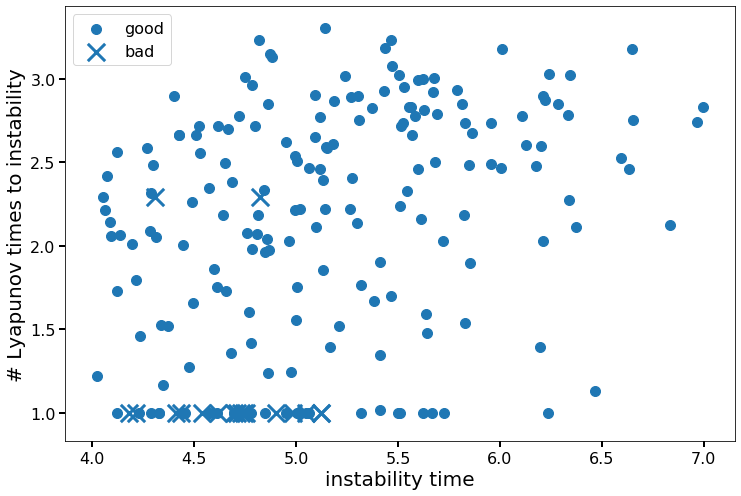

In [15]:
cmap = plt.get_cmap("tab10")
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.log10(dfrand['instability_time'])[~badrand], np.log10(dfrand['Nlyap10'])[~badrand], c=cmap(0), marker='o', label='good')
ax.scatter(np.log10(dfrand['instability_time'])[badrand], np.log10(dfrand['Nlyap10'])[badrand], c=cmap(0), marker='x', s=300, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

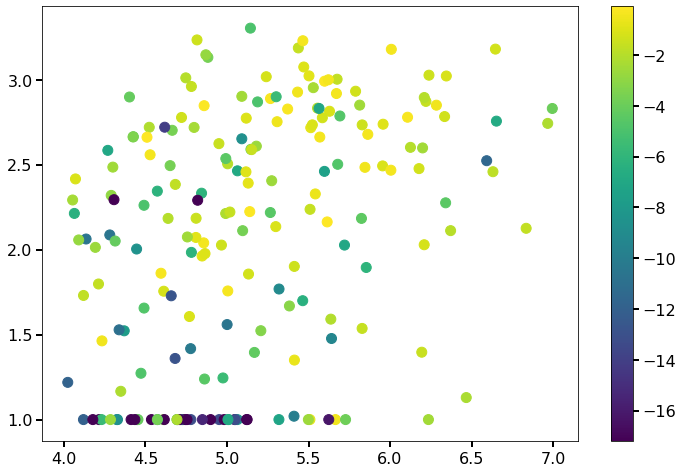

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(dfrand['instability_time']), np.log10(dfrand['Nlyap10']), c=np.log10(dfrand['KSpval']), vmin=np.log10(cutoffrand))
plt.colorbar(cb)